In [0]:
# importando bibliotecas que serão utilizadas
# é uma boa pratica de programação importa-las 
# no inicio e não no meio do código

import random # gerador de números aleatórios
import numpy as np # biblioteca Numpy para manipulação de Matrizes
import pandas as pd # biblioteca Pandas é usada para manipulação de Tabelas
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

from sklearn.preprocessing import StandardScaler # modulo para padronizar os dados
from sklearn.preprocessing import MinMaxScaler # modulo para normalizar os dados
from sklearn.decomposition import PCA # modulo para aplicar PCA nos dados

random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados

## 1)

> Leia os dados com erro novamente, faça a limpeza e remova as duas últimas colunas.

In [0]:
# CSV file
data = pd.read_csv('data/iris-with-errors.csv') # leitura do arquivo csv

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [0]:
# remover valores nulos
data = data.replace('?', np.nan) # substitui '?' por valores nulos
data = data.dropna() # remove os valores nulos

# Remove as linhas duplicadas
data = data.drop_duplicates()

# Remove as duas últimas colunas
data = data.drop(data.columns[-2:], axis=1)

In [6]:
data.head() # mostra os primeiros cinco elementos

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5


## 2)

> Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [7]:
# CSV file
df = pd.read_csv('data/iris-with-errors.csv') # leitura do arquivo csv

data = df.iloc[:,:-1] # separando os dados, removendo a ultima coluna (target)

data = data.replace('?', np.nan) # substitui '?' por valores nulos

data.dtypes # vamos ver os tipos de cada coluna.

sepal_length     object
sepal_width      object
petal_length    float64
petal_width      object
dtype: object

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,5.1,3.5,1.4,0.2
2,NaN,3,1.4,0.2
3,4.7,3.2,1.3,0.2
4,5.1,3.5,1.4,0.2


In [9]:
# podemos observar que alguns são colunas de strings (apesar de serem valores numericos). 
# Vamos mudar isso transformando os valores string em numericos
data = data.apply(pd.to_numeric) 

# agora, vamos verificar os novos tipos das colunas
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
# agora que temos os arquivos como valores numericos, podemos aplicar a mediana. 
# Repare que na linha de indice 2, muda o valor nulo para a mediana da coluna
data = data.fillna(data.median())
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.5,1.4,0.2
1,5.10,3.5,1.4,0.2
2,5.05,3.0,1.4,0.2
3,4.70,3.2,1.3,0.2
4,5.10,3.5,1.4,0.2


## 3)

> Considere os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.5,1.4,0.2
1,5.10,3.5,1.4,0.2
2,5.05,3.0,1.4,0.2
3,4.70,3.2,1.3,0.2
4,5.10,3.5,1.4,0.2


### Normalização

In [12]:
X = data.copy() # copiamos o dataframe que ja tratamos valores nulos no ultimo exercicio

# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))

# Realiza a normalização e coloca em um novo vetor
X_normalizado = scaler.fit_transform(X)

# vamos colocar isso no dataframe, só para visualizarmos um pouco melhor.
# Reparem que não estou atribuindo a nenhuma variável. Somente printando o Dataframe
pd.DataFrame(X_normalizado, columns=data.columns).head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.533333,0.400000,0.500000,0.333333
1,0.533333,0.400000,0.500000,0.333333
2,0.500000,0.066667,0.500000,0.333333
3,0.266667,0.200000,0.333333,0.333333
4,0.533333,0.400000,0.500000,0.333333


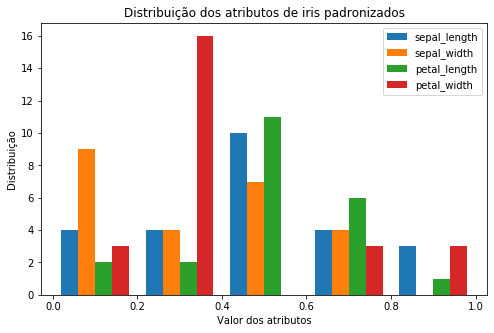

In [13]:
bin_size = 0.2 # tamanho do bin para plotar o histograma. Mude isso e veja a alteração no resultado

bins = np.arange(0, 1 + bin_size, bin_size)

# Agora podemos visualizar a distribuição em um histograma
fig = plt.figure(figsize=(8, 5))
plt.hist(X_normalizado, label=data.columns, bins=bins); # plota o histograma
plt.title('Distribuição dos atributos de iris padronizados') # muda o titulo do grafico
plt.xlabel('Valor dos atributos') # muda o nome do eixo x
plt.ylabel('Distribuição') # muda o nome do eixo y
plt.legend(); # necessario para mostrar a legenda

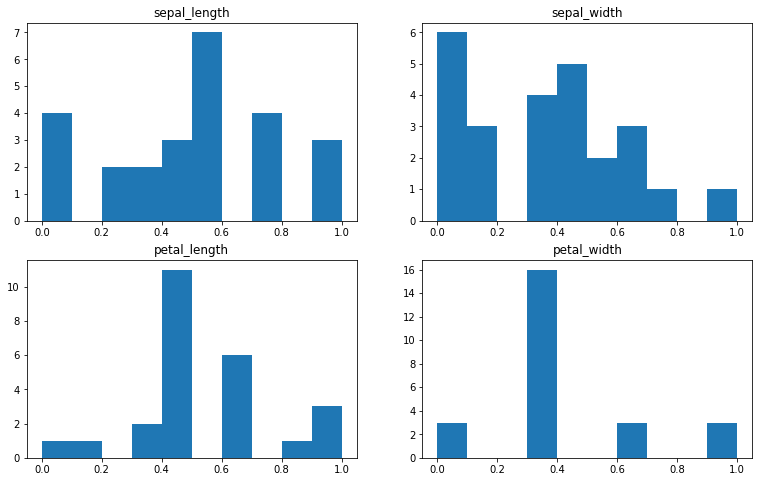

In [14]:
# Agora, vamos plotar um gráfico para cada coluna dos dados, para observamos melhor cada coluna

fig = plt.figure(figsize=(13,8))

# vamos transpor a matriz somente para facilitar o loop nas colunas a seguir.
# após isso, quando rodarmos um "for" em X_transpose, cada interação tem como retorno os valores de uma coluna.
X_transposta = X_normalizado.T # o ".T" retorna a matriz transposta
columns_name = data.columns # vamos criar um vetor com todas os nomes das colunas dos nossos dados

# o comando "zip" abaixo ele é criado para retornar os valores, par a par, dos dois vetores passados.
# por exemplo, se eu fizer um zip([1, 2], [3, 4]), e rodar um loop "for" desse zip, terei a dupla [1, 3]...
# ...na primeira interação e a dupla [2, 4] na segunda interação.
# Faremos isso para obter os nomes das colunas em "columns_name" e seus respectivos valores em "X_transpose"...
# ... para podermos plotar os gráficos e seus respectivos titulos.

zipped_values = zip(columns_name, X_transposta)

# Abaixo, rodamos um "for" nos nossos zipped values. O comando "enumerate" vai enumerar e retornar um valor...
# ... na variável "idx", que começa em 1 e continua incrementando de um em  um.
# Isso é feito para realizar os subplots e criar gráficos separados
for idx, (col_name, values) in enumerate(zipped_values, start=1): 
    plt.subplot(2, 2, idx) # cria um subplot. Gráfico individual.
    plt.hist(values) # cria um histograma com os valores da coluna especifica
    plt.title(col_name) # coloca o titulo no gráfico

In [15]:
# Vamos ver como está a média e a variância
media = X_normalizado.mean()
variancia = X_normalizado.var()

print(f"Média da distribuição: {media}")
print(f"Variância da distribuição: {variancia}")

Média da distribuição: 0.4556666666666666
Variância da distribuição: 0.07362344444444442


### Padronização

In [16]:
X = data.copy() # copiamos o dataframe que ja tratamos valores nulos no ultimo exercicio

# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)

# Realiza a padronização e coloca em um novo vetor
X_padronizado = scaler.fit_transform(X)

# vamos colocar isso no dataframe, só para visualizarmos um pouco melhor.
# Reparem que não estou atribuindo a nenhuma variável. Somente printando o Dataframe
pd.DataFrame(X_padronizado, columns=data.columns).head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.180529,0.157859,-0.288675,-0.294884
1,0.180529,0.157859,-0.288675,-0.294884
2,0.058550,-1.115201,-0.288675,-0.294884
3,-0.795302,-0.605977,-1.010363,-0.294884
4,0.180529,0.157859,-0.288675,-0.294884


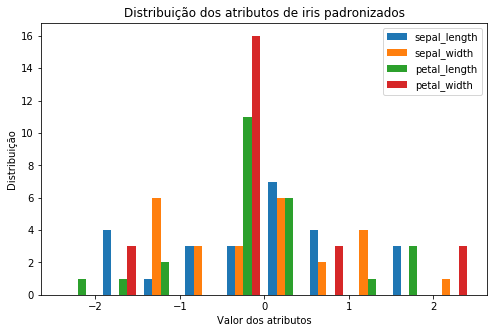

In [17]:
# Agora podemos visualizar a distribuição em um histograma
fig = plt.figure(figsize=(8,5))

plt.hist(X_padronizado, label=data.columns); # plota o histograma
plt.title('Distribuição dos atributos de iris padronizados') # muda o titulo do grafico
plt.xlabel('Valor dos atributos') # muda o nome do eixo x
plt.ylabel('Distribuição') # muda o nome do eixo y
plt.legend(); # necessario para mostrar a legenda

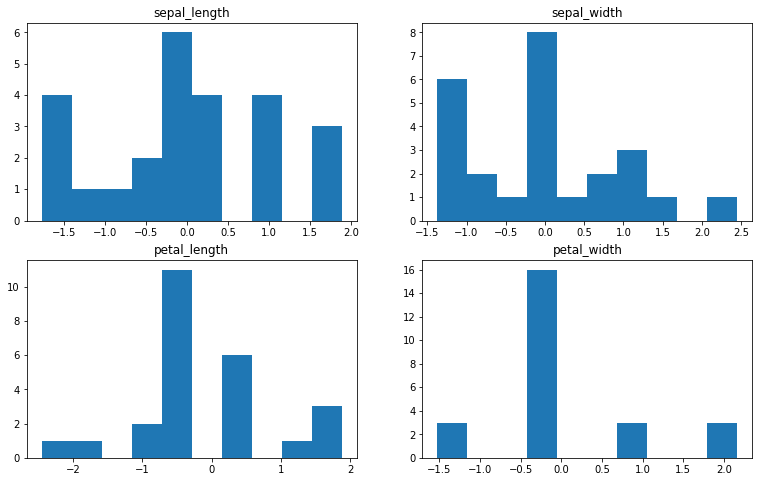

In [18]:
fig = plt.figure(figsize=(13, 8))

# vamos transpor a matriz somente para facilitar o loop nas colunas a seguir.
# após isso, quando rodarmos um "for" em X_transpose, cada interação tem como retorno os valores de uma coluna.
X_transposta = X_padronizado.T 
columns_name = data.columns # vamos criar um vetor com todas os nomes das colunas dos nossos dados

# o comando "zip" abaixo ele é criado para retornar os valores, par a par, dos dois vetores passados.
# por exemplo, se eu fizer um zip([1, 2], [3, 4]), e rodar um loop "for" desse zip, terei a dupla [1, 3]...
# ...na primeira interação e a dupla [2, 4] na segunda interação.
# Faremos isso para obter os nomes das colunas em "columns_name" e seus respectivos valores em "X_transpose"...
# ... para podermos plotar os gráficos e seus respectivos titulos.

zipped_values = zip(columns_name, X_transposta)

# Abaixo, rodamos um "for" nos nossos zipped values. O comando "enumerate" vai enumerar e retornar um valor...
# ... na variável "idx", que começa em 1 e continua incrementando de um em  um.
# Isso é feito para realizar os subplots e criar gráficos separados
for idx, (col_name, values) in enumerate(zipped_values, start=1): 
    plt.subplot(2, 2, idx) # cria um subplot. Gráfico individual.
    plt.hist(values) # cria um histograma com os valores da coluna especifica
    plt.title(col_name) # coloca o titulo no gráfico

In [19]:
# Podemos observar que a media se aproxima muito de 0 e a variancia é igual a 1
media = X_padronizado.mean()
variancia = X_padronizado.var()

print(f"Média da distribuição: {media}")
print(f"Variância da distribuição: {variancia}")

Média da distribuição: -4.440892098500626e-18
Variância da distribuição: 1.0000000000000002


## 4)

> Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [0]:
# vamos usar o nosso dataframe inicial, antes de fazer qualquer alteraçao
# primeiro, criamos um dataframe vazio para nossa resposta
df_resample = pd.DataFrame(columns=df.columns)

# definimos o numero de elementos
n = 10 

# criamos um vetor com todas as possiveis especies.
# df['species'] acessa a coluna "species" e unique() retorna os valores unicos dessa coluna
targets = list(df['species'].unique())

# para cada um dos targets, faremos:
for t in targets:
    df_aux = df.loc[df["species"] == t]                 # filtramos pela classe
    df_aux = df_aux.sample(n, replace=True)             # usamos a funcao sample que retorna um sample aleatorio. replace é necessário pois estamos repetindo amostras.
    df_resample = pd.concat([df_resample, df_aux])      # concatenamos com nosso dataframe resultad

In [21]:
# Note que temos a mesma quantidade de elementos para ambas das classes
df_resample

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,duplicada
14,4.4,2.9,1.4,0.2,duplicada
7,5.4,3.9,1.7,0.4,duplicada
14,4.4,2.9,1.4,0.2,duplicada
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
8,5.4,3.9,1.7,0.4,duplicada
7,5.4,3.9,1.7,0.4,duplicada
11,4.4,2.9,1.4,0.2,duplicada
17,4.4,2.9,1.4,0.2,duplicada


## 5)

> Monte um boxplot para cada variável dos dados da Iris.

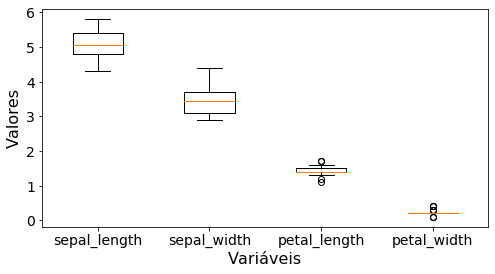

In [22]:
plt.figure(figsize=(8, 4))
plt.boxplot(data.values)
plt.xticks(np.arange(1, len(data.columns) + 1), data.columns)
plt.xlabel('Variáveis', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

## 6)

> Encontre os outliers nos dados das bases Iris e BostonHouse.

In [0]:
# Para encontrar outliers podemos utilizar a diferença interquartil como demonstrado em aula
# Como precisamos encontrar os outliers para os dois conjuntos de dados,
# podemos criar uma função para reutilizar em ambos

def detecta_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    matches = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))
    return df[matches.any(1)]

### Iris

In [25]:
# leitura do arquivo csv
iris = pd.read_csv('data/iris.csv')

# elimina a variavel target para o processo de deteção de outliers
iris = iris.drop(columns='species')

detecta_outliers(iris)

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


### Boston House

In [27]:
# leitura do arquivo csv
boston = pd.read_csv('data/BostonHousing.csv')

# variavel nox e medv podem ser usadas em tarefas preditivas,
# porem como não sabemos qual delas será o target,
# utilizamos todo o conjunto de dados, caso contrário as variaveis
# deveriam ser descartadas para a analise de outliers
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

detecta_outliers(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0


## 8)

> Realize o PCA nos dados da base BostonHouse.

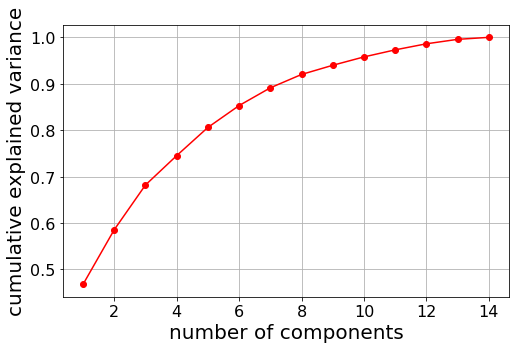

In [28]:
boston = pd.read_csv('data/BostonHousing.csv')

# Como temos 14 variaveis, podemos reduzir a dimensionalidade para qualquer valor abaixo disso
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(boston.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
scaler = StandardScaler().fit(boston)
boston_transformed = scaler.transform(boston)

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(boston_transformed)

# mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas duas variaveis conseguimos explicar 95% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.grid(True)
plt.show(True)